In [1]:
import os
import warnings
from pprint import pprint

#os.environ['CLIENT_ID'] = '<YOUR ID HERE>'
#os.environ['CLIENT_SECRET'] = '<YOUR SECRET HERE>'

In [2]:
import descarteslabs as dl

In [3]:
# Find potential matches
matches = dl.places.find('new-york_putnam')
pprint(matches)
# The first one looks good to me, so lets make that our area of interest.
aoi = matches[0]

[{u'bbox': [-73.982584, 41.321693, -73.530067, 41.527194],
  u'id': 102083007,
  u'name': u'Putnam',
  u'path': u'continent:north-america_country:united-states_region:new-york_district:southeast_county:putnam',
  u'placetype': u'county',
  u'slug': u'north-america_united-states_new-york_southeast_putnam'}]


In [4]:
# This area of interest just gives us some basic properties such as bounding boxes.
# To access a GeoJSON Geometry object of that place, we call the `Places.shape` method, in this case
# accessing a low-resolution version of this particular shape.
shape = dl.places.shape(aoi['slug'], geom='low')

In [5]:
shape

{u'bbox': [-73.982584, 41.321693, -73.530067, 41.527194],
 u'geometry': {u'coordinates': [[[-73.838363, 41.498126],
    [-73.692664, 41.512246],
    [-73.579783, 41.526461],
    [-73.530067, 41.527194],
    [-73.536334, 41.446632],
    [-73.544728, 41.366375],
    [-73.982584, 41.321693],
    [-73.961257, 41.348539],
    [-73.956801, 41.372205],
    [-73.947294, 41.394765],
    [-73.949338, 41.39816],
    [-73.959136, 41.400442],
    [-73.961775, 41.402822],
    [-73.963057, 41.410344],
    [-73.966643, 41.417425],
    [-73.981551, 41.439008],
    [-73.933775, 41.488279],
    [-73.838363, 41.498126]]],
  u'type': u'Polygon'},
 u'id': 102083007,
 u'properties': {u'name': u'Putnam',
  u'parent_id': 304000145,
  u'path': u'continent:north-america_country:united-states_region:new-york_district:southeast_county:putnam',
  u'placetype': u'county',
  u'slug': u'north-america_united-states_new-york_southeast_putnam'},
 u'type': u'Feature'}

In [6]:
import scipy

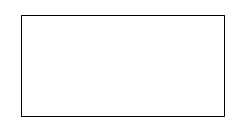

In [7]:
# If you'd like, load up some libraries like matplotlib, shapley, and cartopy,
# and use them to plot Taos county.
#%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import shapely.geometry
import cartopy

bbox = shape['bbox']

# Lets load up the Albers Equal Area projection.
lonlat_crs = cartopy.crs.PlateCarree()
#lonlat_crs = cartopy.crs.AlbersEqualArea(central_latitude=36.0, central_longitude=-105)
albers = cartopy.crs.PlateCarree()
#albers = cartopy.crs.AlbersEqualArea(central_latitude=36.0, central_longitude=-105)

#albers     = cartopy.crs.Globe(central_latitude=36.0, central_longitude=-105)

fig = plt.figure(figsize=(4, 8))
ax = plt.subplot(projection=albers) # Specify projection of the map here
shp = shapely.geometry.shape(shape['geometry'])

# When adding a geometry in latlon coordinates, specify the latlon projection
#ax.add_geometries([shp], lonlat_crs)

# # You can set extents in latlon, as long as you specify the projection with `crs`
#ax.set_extent((bbox[0], bbox[2], bbox[1], bbox[3]), crs=lonlat_crs)
#ax.gridlines(crs=lonlat_crs)



plt.show()


In [8]:
shape

{u'bbox': [-73.982584, 41.321693, -73.530067, 41.527194],
 u'geometry': {u'coordinates': [[[-73.838363, 41.498126],
    [-73.692664, 41.512246],
    [-73.579783, 41.526461],
    [-73.530067, 41.527194],
    [-73.536334, 41.446632],
    [-73.544728, 41.366375],
    [-73.982584, 41.321693],
    [-73.961257, 41.348539],
    [-73.956801, 41.372205],
    [-73.947294, 41.394765],
    [-73.949338, 41.39816],
    [-73.959136, 41.400442],
    [-73.961775, 41.402822],
    [-73.963057, 41.410344],
    [-73.966643, 41.417425],
    [-73.981551, 41.439008],
    [-73.933775, 41.488279],
    [-73.838363, 41.498126]]],
  u'type': u'Polygon'},
 u'id': 102083007,
 u'properties': {u'name': u'Putnam',
  u'parent_id': 304000145,
  u'path': u'continent:north-america_country:united-states_region:new-york_district:southeast_county:putnam',
  u'placetype': u'county',
  u'slug': u'north-america_united-states_new-york_southeast_putnam'},
 u'type': u'Feature'}

In [54]:
# What imagery is available?
sources = dl.metadata.sources()
pprint(sources)

[{u'product': u'modis:09:CREFL', u'sat_id': u'Terra'},
 {u'product': u'modis:09:CREFL', u'sat_id': u'Aqua'},
 {u'product': u'sentinel-2:L1C', u'sat_id': u'S2A'},
 {u'product': u'sentinel-2:L1C', u'sat_id': u'S2B'},
 {u'product': u'landsat:LE07:PRE:TOAR', u'sat_id': u'LANDSAT_7'},
 {u'product': u'landsat:LE07:PRE:TOAR', u'sat_id': u'Landsat7'},
 {u'product': u'landsat:LT05:PRE:TOAR', u'sat_id': u'LANDSAT_5'},
 {u'product': u'landsat:LT05:PRE:TOAR', u'sat_id': u'Landsat5'},
 {u'product': u'sentinel-3:OLCI_RGB', u'sat_id': u'S3A'},
 {u'product': u'landsat:LC08:PRE:TOAR', u'sat_id': u'LANDSAT_8'},
 {u'product': u'usda:naip:rgbn', u'sat_id': u'NAIP'},
 {u'product': u'landsat:LC08:PRE:LaSRC', u'sat_id': u'L8SR'},
 {u'product': u'sentinel-1:GRD', u'sat_id': u'SENTINEL-1A'},
 {u'product': u'sentinel-1:GRD', u'sat_id': u'SENTINEL-1B'},
 {u'product': u'usda:naip:rgbn:v1', u'sat_id': u'NAIP'},
 {u'product': u'landsat:LC08:01:RT:TOAR', u'sat_id': u'LANDSAT_8'},
 {u'product': u'landsat:LC08:01:T1:T

In [55]:
import json
feature_collection = dl.metadata.search(sat_id='LANDSAT_7', start_time='2011-03-12',
                                        end_time='2017-03-20', limit=20, place=aoi['slug'])
# As the variable name implies, this returns a FeatureCollection GeoJSON dictionary.
# Its 'features' are the available scenes.
print len(feature_collection['features'])
# The 'id' associated with each feature is a unique identifier into our imagery database.
# In this case there are two L8 scenes from adjoining WRS rows.
print [f['id'] for f in feature_collection['features']]

20
[u'landsat:LE07:PRE:TOAR:meta_LE70140312012222_v1', u'landsat:LE07:PRE:TOAR:meta_LE70130312012359_v1', u'landsat:LE07:PRE:TOAR:meta_LE70130312016274_v1', u'landsat:LE07:PRE:TOAR:meta_LE70140312016313_v1', u'landsat:LE07:PRE:TOAR:meta_LE70140312013016_v1', u'landsat:LE07:PRE:TOAR:meta_LE70130312015255_v1', u'landsat:LE07:PRE:TOAR:meta_LE70140312015342_v1', u'landsat:LE07:PRE:TOAR:meta_LE70130312016194_v1', u'landsat:LE07:PRE:TOAR:meta_LE70140312012350_v1', u'landsat:LE07:PRE:TOAR:meta_LE70140312017011_v1', u'landsat:LE07:PRE:TOAR:meta_LE70140312011187_v1', u'landsat:LE07:PRE:TOAR:meta_LE70130312015319_v1', u'landsat:LE07:PRE:TOAR:meta_LE70140312015150_v1', u'landsat:LE07:PRE:TOAR:meta_LE70130312015063_v1', u'landsat:LE07:PRE:TOAR:meta_LE70140312015118_v1', u'landsat:LE07:PRE:TOAR:meta_LE70140312012062_v1', u'landsat:LE07:PRE:TOAR:meta_LE70140312012158_v1', u'landsat:LE07:PRE:TOAR:meta_LE70130312017036_v1', u'landsat:LE07:PRE:TOAR:meta_LE70140312014179_v1', u'landsat:LE07:PRE:TOAR:met

In [56]:
len(feature_collection['features'])

20

In [57]:
# Lets look at the first feature. The features are a FeatureCollection,
# so if we print it out we get a bunch of information. For example, we see that
# the overall cloud fraction is 1.2%.:
for i in range(0, len(feature_collection['features'])):
    print i
    f0 = feature_collection['features'][i]
    pprint(f0)

0
{u'geometry': {u'coordinates': [[[-75.3163633, 42.7169015],
                                 [-73.0191571, 42.3664586],
                                 [-73.5744674, 40.8071789],
                                 [-75.8141441, 41.1491363],
                                 [-75.3163633, 42.7169015]]],
               u'type': u'Polygon'},
 u'id': u'landsat:LE07:PRE:TOAR:meta_LE70140312012222_v1',
 u'key': u'meta_LE70140312012222_v1',
 u'properties': {u'acquired': u'2012-08-09T15:34:32.564024Z',
                 u'bucket': u'gs://descartes-l7/',
                 u'cloud_fraction_0': 0.19,
                 u'cs_code': u'EPSG:32618',
                 u'descartes_version': u'satin-0.8.2.1',
                 u'file_sizes': [50340424, 40086870],
                 u'files': [u'2012-08-09_014031_L7_321.jp2',
                            u'2012-08-09_014031_L7_457_6.jp2'],
                 u'geotrans': [428392.5, 15.0, 0.0, 4731307.5, 0.0, -15.0],
                 u'identifier': u'LE7014031201222

                 u'sat_id': u'LANDSAT_7',
                 u'scan_gap_interpolation': 2.0,
                 u'solar_azimuth_angle': 151.00368164,
                 u'solar_elevation_angle': 37.5530607,
                 u'sw_version': u'LPGS_12.5.0',
                 u'terrain_correction': u'L1G',
                 u'tile_id': u'013031'},
 u'type': u'Feature'}
14
{u'geometry': {u'coordinates': [[[-75.3279807, 42.7159835],
                                 [-73.019388, 42.364748],
                                 [-73.57154, 40.8044084],
                                 [-75.82632, 41.1476771],
                                 [-75.3279807, 42.7159835]]],
               u'type': u'Polygon'},
 u'id': u'landsat:LE07:PRE:TOAR:meta_LE70140312015118_v1',
 u'key': u'meta_LE70140312015118_v1',
 u'properties': {u'acquired': u'2015-04-28T15:38:46.023631Z',
                 u'bucket': u'gs://descartes-l7/',
                 u'cloud_fraction_0': 0.25,
                 u'cs_code': u'EPSG:32618',
      

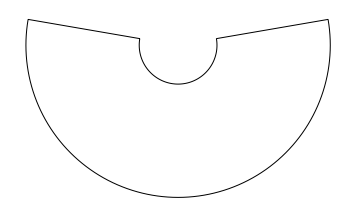

In [13]:
# Let's plot the footprints of the scenes:
lonlat_crs = cartopy.crs.PlateCarree()
albers = cartopy.crs.AlbersEqualArea(central_latitude=36.0, central_longitude=-105)

fig = plt.figure(figsize=(6, 8))
ax = plt.subplot(projection=albers) # Specify projection of the map here

#ax.add_geometries([shapely.geometry.shape(shape['geometry'])], lonlat_crs)

# Get the geometry from each feature
#shapes = [shapely.geometry.shape(f['geometry']) for f in feature_collection['features']]

#ax.add_geometries(shapes, lonlat_crs, alpha=0.3, color='green')

# Get a bounding box of the combined scenes
#union = shapely.geometry.MultiPolygon(polygons=shapes)
#bbox = union.bounds
#ax.set_extent((bbox[0], bbox[2], bbox[1], bbox[3]), crs=lonlat_crs)
#ax.gridlines(crs=lonlat_crs)

plt.show()

In [14]:
band_information = dl.raster.get_bands_by_constellation("landsat:LC08:PRE:TOAR")
# or
#band_information = dl.raster.get_bands_by_key(feature_collection['features'][0]['id'])
pprint(band_information.keys())

[u'thermal',
 u'ndvi',
 u'cloud',
 u'blue',
 u'qa_water',
 u'visual_cloud_mask',
 u'ndwi2',
 u'ndwi1',
 u'qa_snow',
 u'qa_cirrus',
 u'aerosol',
 u'red',
 u'rsqrt',
 u'nir',
 u'alpha',
 u'ndwi',
 u'evi',
 u'swir1',
 u'swir2',
 u'bright',
 u'green',
 u'qa_cloud',
 u'cirrus',
 u'bai']


/Users/danielmsheehan/GitHub/descartes_labs_notebook/env/lib/python2.7/site-packages/descarteslabs/services/raster.py:70: DeprecationWarning: 
Band retrieval through the raster service is deprecated, and will be
removed eventually. Use the corresponding methods on the metadata
service instead.
  warnings.warn(RASTER_BANDS_WARNING, DeprecationWarning)


In [15]:
# There is metadata associated with each band. In this case, we can tell that the "red" band
# is stored as a UInt16 dataset, has a valid range of [0, 10000] which maps to [0, 1.0] in
# Top-of-atmosphere-reflectance.
pprint(band_information['red'])

{u'color': u'Red',
 u'description': None,
 u'dtype': u'UInt16',
 u'name': u'red',
 u'nbits': 14,
 u'nodata': None,
 u'physical_range': [0.0, 1.0],
 u'shortname': u'r',
 u'valid_range': [0, 10000]}


In [32]:
# Collect the id's for each feature
ids = [f['id'] for f in feature_collection['features']]
# Rasterize the features.
#  * Select red, green, blue, alpha
#  * Scale the incoming data with range [0, 10000] down to [0, 4000] (40% TOAR)
#  * Choose an output type of "Byte" (uint8)
#  * Choose 60m resolution
#  * Apply a cutline of Taos county
arr, meta = dl.raster.ndarray(
    ids,
    bands=['red', 'green', 'blue', 'alpha'],
    scales=[[0,10000], [0, 10000], [0, 10000], None],
    data_type='Byte',
    resolution=5,
    cutline=shape['geometry'],
)

# Note: A value of 1 in the alpha channel signifies where there is valid data.
# We use this throughout the majority of our imagery as a standard way of specifying
# valid or nodata regions. This is particularly helpful if a value of 0 in a particular
# band has meaning, rather than specifying a lack of data.

In [33]:
# We'll use matplotlib to make a quick plot of the image.
import matplotlib.pyplot as plt
%matplotlib inline

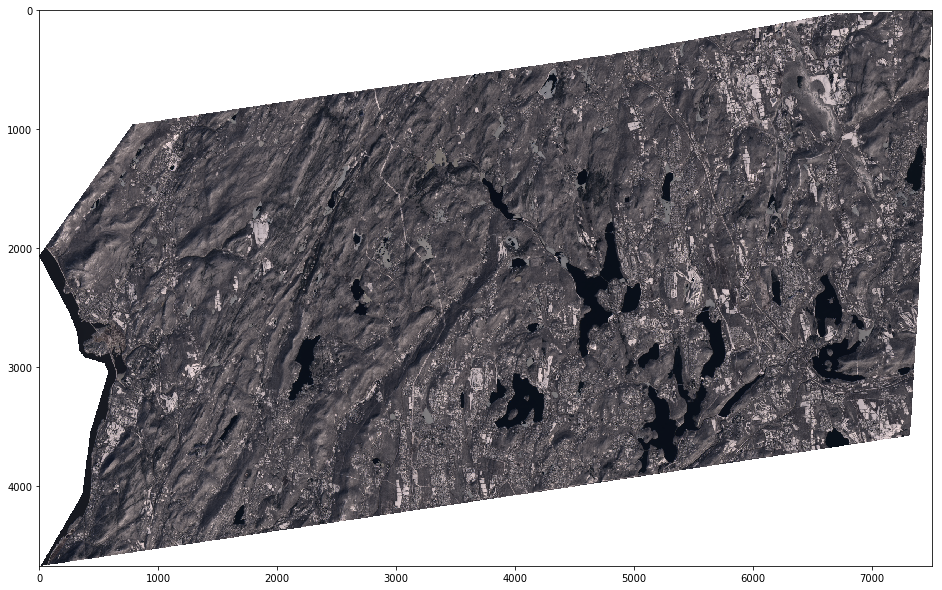

In [34]:
plt.figure(figsize=[16,16])
plt.imshow(arr)

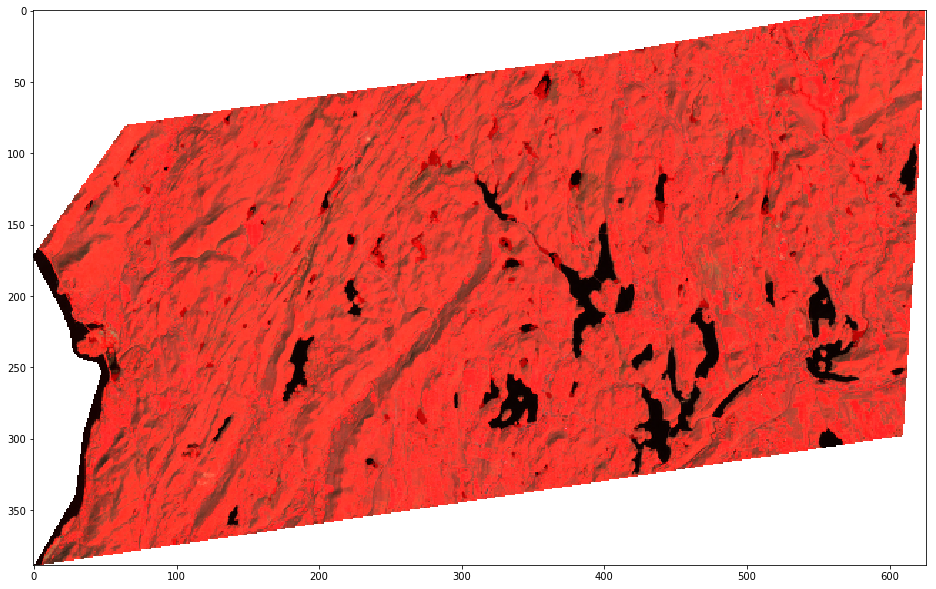

In [24]:
# We can choose other false color band combinations, like
# NIR - SWIR1 - SWIR2
arr, meta = dl.raster.ndarray(
    ids,
    bands=['nir', 'swir1', 'swir2', 'alpha'],
    scales=[[0,4000], [0, 4000], [0, 4000], None],
    cutline=shape['geometry'],
    data_type='Byte',
    resolution=60
)
plt.figure(figsize=[16,16])
plt.imshow(arr)

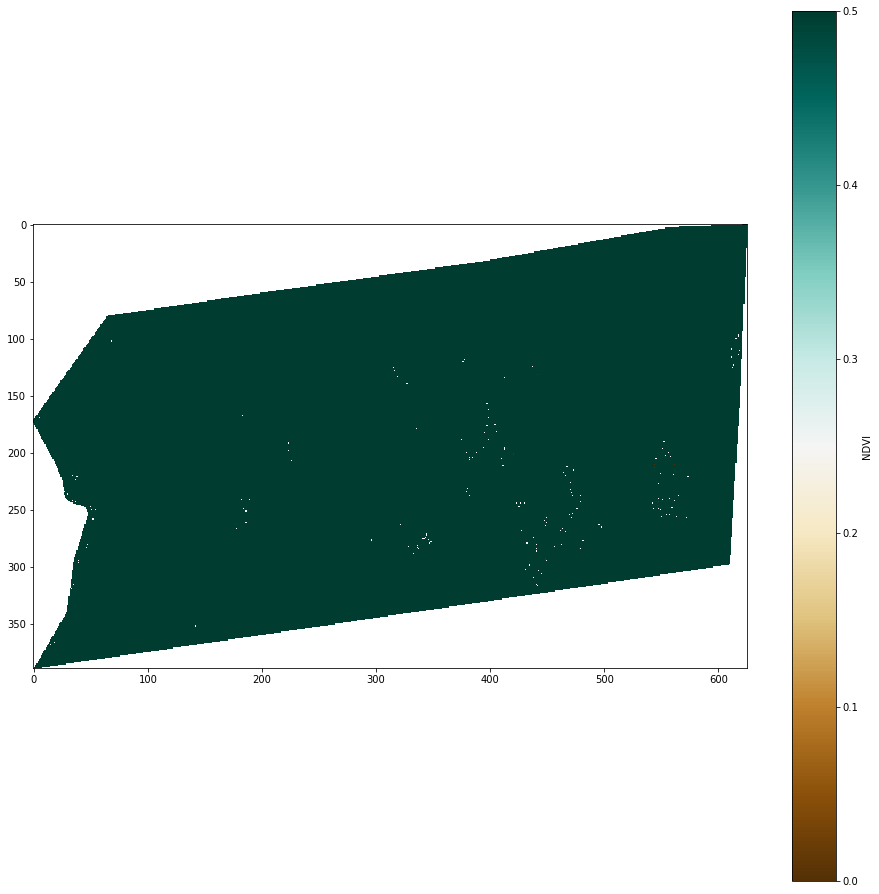

In [20]:
# Here we can make a numpy masked array using alpha == 0 as a nodata mask.
import numpy as np
mask = arr[:, :, 1] == 0
masked_ndvi = np.ma.masked_array(arr[:, :, 0], mask)
plt.figure(figsize=[16,16])
plt.imshow(masked_ndvi, cmap='BrBG', vmin=0, vmax=0.5)
cb = plt.colorbar()
cb.set_label("NDVI")